## Plot CSV
The goal of this notebook is to take a csv from the embedded ESP8266 device in the and utilize matplotlib to plot both the humdity and temperature over time

In [23]:
# Standard Libraries
import datetime
import csv
import os
import time

# 3rd Party Libraries
import matplotlib.pyplot as plt


In [10]:
import sys
sys.executable

'/usr/local/opt/python@3.9/bin/python3.9'

In [24]:
# Environment Variables
csv_file_path = "data/rpm.csv"
csv_data = ""

## Requesting Data
This section is going to make the requests to the embedded device, parse for content (note this is not body nor json but that actual html text)
Then it is going to convert that content to a csv and then create lists of each column of the csv (timestamp, temp, humidity)

In [25]:
# Request for data
with open(csv_file_path, 'r') as f:
    csv_data = f.read()

In [26]:
# Moved this to a seperate cell so I can reload data w/o having to make another request
lines = csv_data.splitlines()[1:]
reader = csv.reader(lines, delimiter=',')

# Create Arrays for the different data
millis_list = []
rpm_list = []

for row in reader:
    millis_list.append(int(row[0]))
    rpm_list.append(int(row[1]))
    

print("First 5 of Millis List: {}".format(millis_list[:5]))
print("First 5 of RPM List: {}".format(rpm_list[:5]))

First 5 of Millis List: [6063, 7064, 8065, 9066, 10067]
First 5 of RPM List: [230, 2242, 1770, 1829, 1711]


## Plotting the Data
In this section were going to plot the humidity and temp as y values a

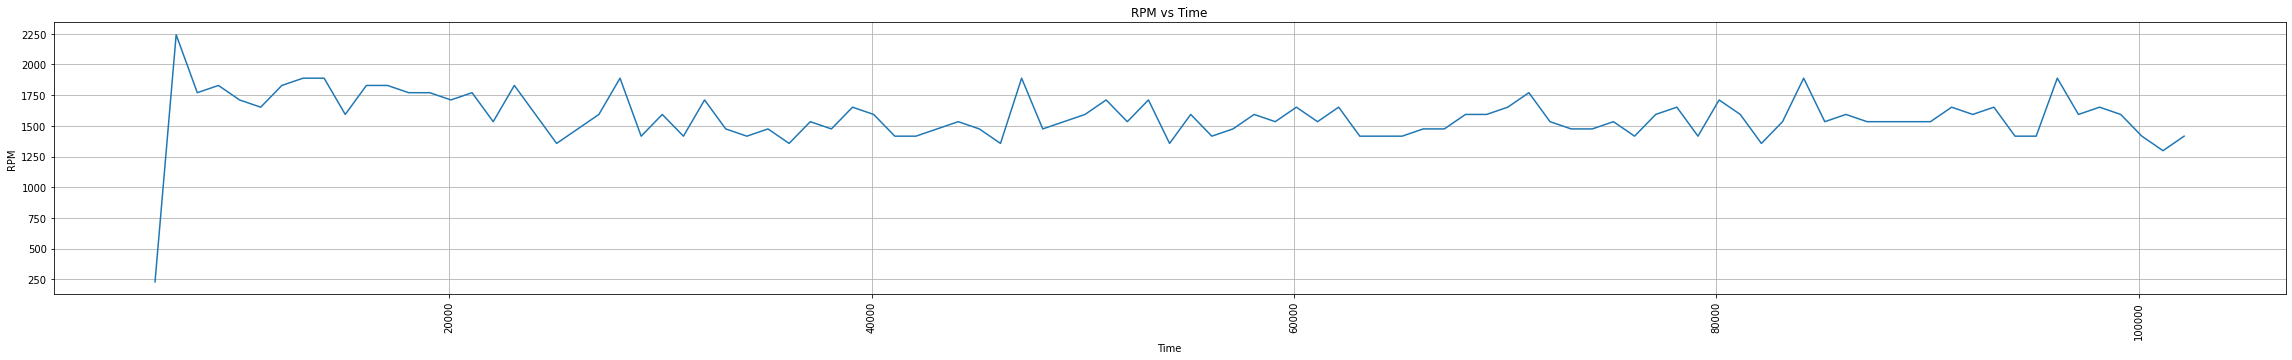

In [27]:
plt.rcParams["figure.figsize"] = (40,5)
plt.plot(millis_list, rpm_list, label='RPM')
plt.title('RPM vs Time')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.xticks(rotation = 90)
#plt.ylim([0,100])
plt.grid()
plt.show()